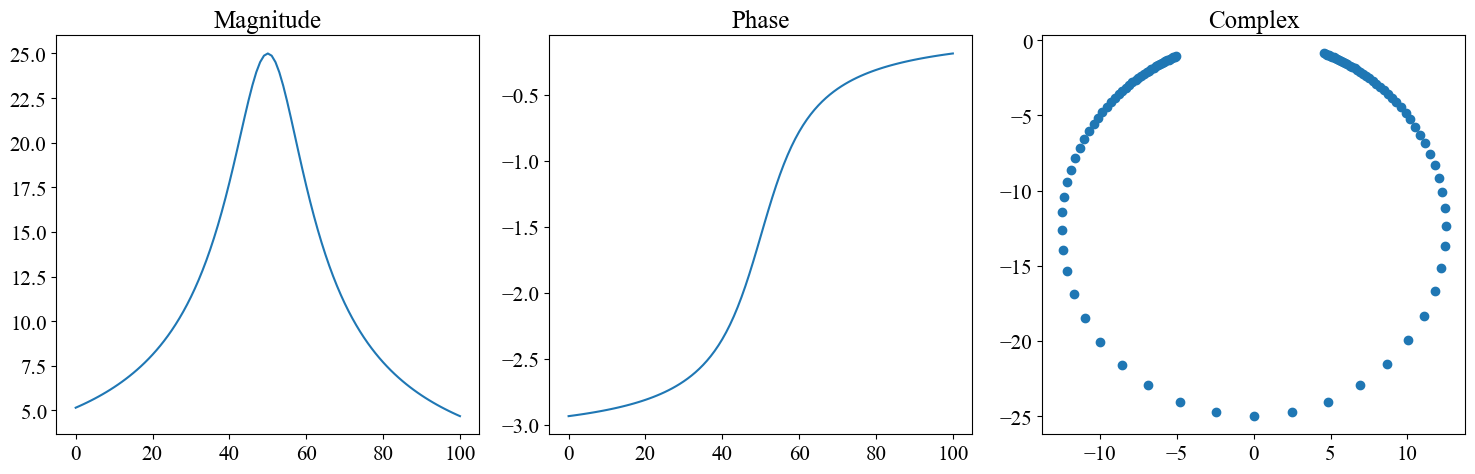

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.constants
import sys
sys.path.append('..')
from reflectarray import element
from reflectarray.reflectarray import Reflectarray
from reflectarray.feed import Feed
from reflectarray.feed import PyramidalHorn
from reflectarray.system import System

C = scipy.constants.c
f = 10E9
lam = C/f

patch1 = element.Patch(f=f, Q=25, lattice_vectors=np.array([[1, 0, 0], [0, 1, 0]]))
patch1.plot()

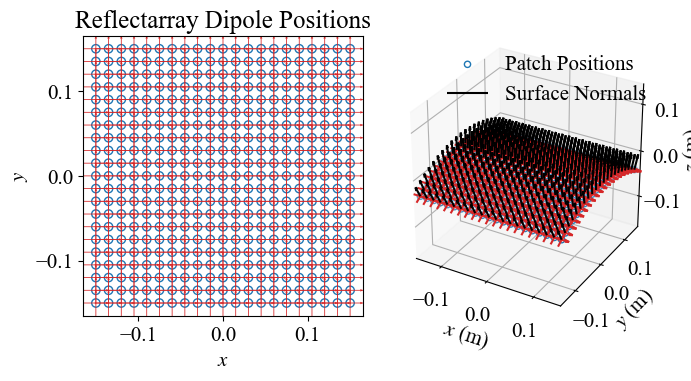

In [2]:
L = 10*lam
delta_x = lam/2
delta_y = lam/2
x = np.arange(-L/2, L/2+delta_x, delta_x)
y = np.arange(-L/2, L/2+delta_y, delta_y)

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

array = Reflectarray(patch1, x=x, y=y)
array.plot(ax=ax1, show_lattice_vectors=True)

array.deform(axis='x', R_cylinder=10*lam)
array.plot(ax=ax2, show_normals=True, show_lattice_vectors=True)

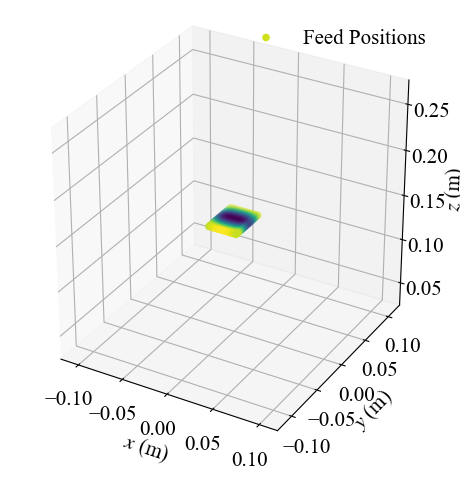

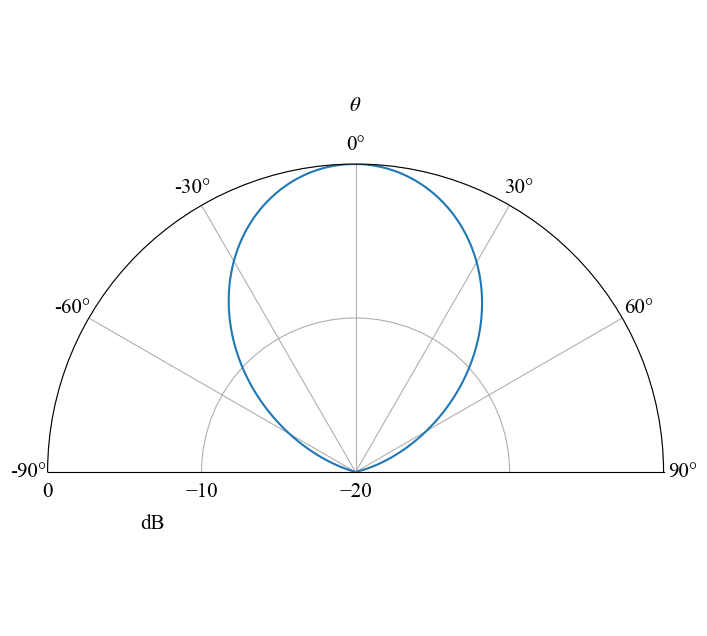

In [3]:
horn = PyramidalHorn(f=f, E0=1, rotation=(0, 0, 90), r_offset=(0, 0, 5*lam), gain=10)

horn.plot(quiver=False, plot_type='3D', plot_value='J_m')
horn.plot_fields(plot_type='1D', dB_min=-20)

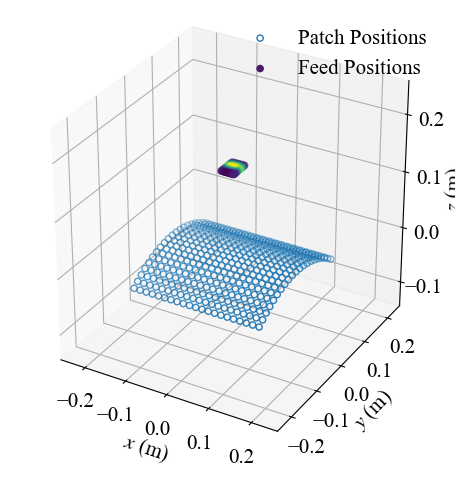

In [4]:
system1 = System(array, horn)
system1.plot()

In [5]:
system1.design(theta_beam=45, phi_beam=90)

Computing feed fields...
Computing ideal polarizabilities...
Computing constrained polarizabilities...


In [6]:
system1.propagate(delta_theta=1, delta_phi=2)

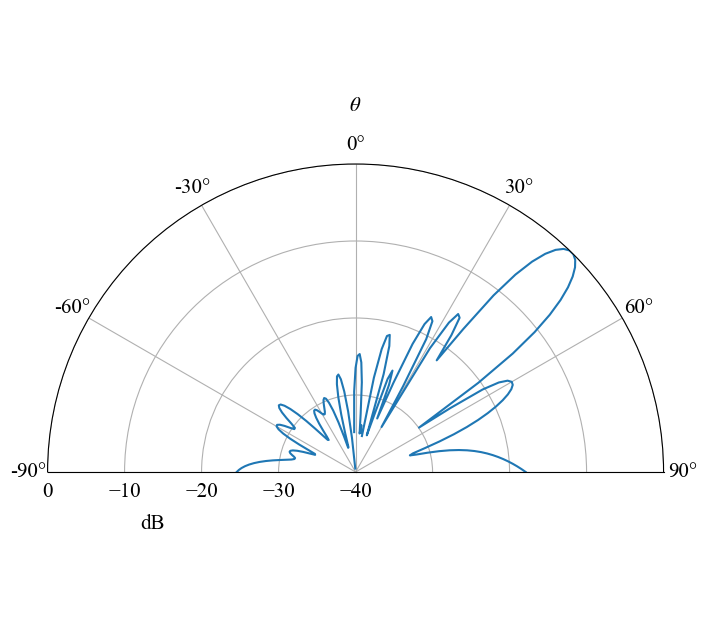

In [7]:
system1.plot_fields(plot_type='1D', phi_slice=90, dB_min=-40)
# system1.plot_fields(plot_type='2D', dB_min=-40)

In [8]:
system1.calculate_beam_metrics()

Beamwidth: 8.19 degrees
Directivity: 28.69 dB
Gain: 27.80 dB
Efficiency: 81.49%
